# Machine Learning Mini Project 3
## Name: Sarosh Krishan
## Student ID: 2302016

Note: Task 3 (visualization) is done before Task 2 since visualization was necessary on Task 1 before moving to Task 2

In [1]:
#run if plotly isn't installed
!pip install plotly

### Necessary Imports 

In [2]:
#data manipulation
import numpy as np
import pandas as pd

#plotting
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlt
import matplotlib.colors as mcolors
import plotly
import plotly.graph_objects as go

#Training and Evaluation
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

### Data Preprocessing

The dataset feature labels given in "features.txt" are extracted

In [3]:
# get the features from the file features.txt
features = list()
with open('C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo\Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/features.txt') as f:
    features = [line.split()[1] for line in f.readlines()]
print('No of Features: {}'.format(len(features)))

No of Features: 561


The columns of the dataset are added from the extracted feature list and the "subject", "Activity" and "ActivityName" columns are added to the train and test dataframes from the respective files to convert the raw data into a dataframe

In [4]:
# get the data from txt files to pandas dataffame
X_train = pd.read_csv('C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo\Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/train/X_train.txt', delim_whitespace=True, header=None)
X_train.columns = [features]

# add subject column to the dataframe
X_train['subject'] = pd.read_csv('C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo\Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/train/subject_train.txt', header=None).squeeze('columns')

y_train = pd.read_csv('C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo\Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/train/y_train.txt', names=['Activity']).squeeze('columns')
y_train_labels = y_train.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS', 4:'SITTING', 5:'STANDING',6:'LAYING'})

# put all columns in a single dataframe
train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample(2)

tBodyAcc-mean()-X tBodyAcc-mean()-Y tBodyAcc-mean()-Z tBodyAcc-std()-X  \
2418          0.275055         -0.016155         -0.108583        -0.998064   
4797          0.292612         -0.013115         -0.112735        -0.956085   

     tBodyAcc-std()-Y tBodyAcc-std()-Z tBodyAcc-mad()-X tBodyAcc-mad()-Y  \
2418        -0.992460        -0.990587        -0.998325        -0.991402   
4797        -0.978074        -0.981799        -0.955765        -0.975871   

     tBodyAcc-mad()-Z tBodyAcc-max()-X  ... angle(tBodyAccMean,gravity)  \
2418        -0.990079        -0.943681  ...                    0.459089   
4797        -0.980806        -0.897889  ...                    0.010015   

     angle(tBodyAccJerkMean),gravityMean) angle(tBodyGyroMean,gravityMean)  \
2418                            -0.116192                        -0.201518   
4797                             0.143321                        -0.175809   

     angle(tBodyGyroJerkMean,gravityMean) angle(X,gravityMean)  \
2418                             0.127120            -0.873805   
4797                            -0.266989             0.513740   

     angle(Y,gravityMean) angle(Z,gravityMean) subject Activity ActivityName  
2418             0.034945            -0.049239      14        4      SITTING  
4797            -0.255266            -0.756396      23        6       LAYING  

[2 rows x 564 columns]

In [5]:
train.shape

(7352, 564)

In [6]:
# get the data from txt files to pandas dataffame
X_test = pd.read_csv('C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo\Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/test/X_test.txt', delim_whitespace=True, header=None)
X_test.columns = [features]
# add subject column to the dataframe
X_test['subject'] = pd.read_csv('C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo\Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/test/subject_test.txt', header=None).squeeze('columns')

# get y labels from the txt file
y_test = pd.read_csv('C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo\Machine Learning 2024/Mini Project 3/Data/UCI HAR Dataset/UCI HAR Dataset/test/y_test.txt', names=['Activity']).squeeze('columns')
y_test_labels = y_test.map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',\
                       4:'SITTING', 5:'STANDING',6:'LAYING'})


# put all columns in a single dataframe
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample(2)

tBodyAcc-mean()-X tBodyAcc-mean()-Y tBodyAcc-mean()-Z tBodyAcc-std()-X  \
480           0.283194         -0.024928         -0.125685        -0.992105   
2763          0.274770         -0.025812         -0.118793        -0.992699   

     tBodyAcc-std()-Y tBodyAcc-std()-Z tBodyAcc-mad()-X tBodyAcc-mad()-Y  \
480         -0.977899        -0.930285        -0.992621        -0.977288   
2763        -0.942365        -0.955890        -0.993629        -0.945423   

     tBodyAcc-mad()-Z tBodyAcc-max()-X  ... angle(tBodyAccMean,gravity)  \
480         -0.919847        -0.933242  ...                   -0.044804   
2763        -0.954288        -0.939191  ...                   -0.004856   

     angle(tBodyAccJerkMean),gravityMean) angle(tBodyGyroMean,gravityMean)  \
480                              0.112692                        -0.739127   
2763                             0.167875                         0.492344   

     angle(tBodyGyroJerkMean,gravityMean) angle(X,gravityMean)  \
480                             -0.479739            -0.852836   
2763                             0.954863            -0.871570   

     angle(Y,gravityMean) angle(Z,gravityMean) subject Activity ActivityName  
480              0.132901            -0.082846       4        5     STANDING  
2763             0.184575             0.039266      24        5     STANDING  

[2 rows x 564 columns]

In [7]:
test.shape

(2947, 564)

The dataframes are checked for duplicate and null entries. None are found.

In [8]:
print('No of duplicates in train: ' + str(sum(train.duplicated())))
print('No of duplicates in test : ' + str(sum(test.duplicated())))

C:\Users\moakht\AppData\Local\Temp\ipykernel_26052\4174543271.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  print('No of duplicates in train: ' + str(sum(train.duplicated())))


No of duplicates in train: 0
No of duplicates in test : 0


C:\Users\moakht\AppData\Local\Temp\ipykernel_26052\4174543271.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  print('No of duplicates in test : ' + str(sum(test.duplicated())))


In [9]:
print('We have {} NaN/Null values in train'.format(train.isnull().values.sum()))
print('We have {} NaN/Null values in test'.format(test.isnull().values.sum()))

We have 0 NaN/Null values in train
We have 0 NaN/Null values in test


The train and test dataframes are combined into a single dataframe since the mini project consists of unsupervised learning which doesn't require train and test splits.

In [10]:
data = [train, test]
dataset = pd.concat(data)

The min and max values for all the columns are checked. Since all the values exist between -1 and 1, it shows that the data is already normalized. Thus, no more scaling or normalization is required.

In [11]:
dataset.min()

tBodyAcc-mean()-X         -1.0
tBodyAcc-mean()-Y         -1.0
tBodyAcc-mean()-Z         -1.0
tBodyAcc-std()-X          -1.0
tBodyAcc-std()-Y          -1.0
                         ...  
angle(Y,gravityMean)      -1.0
angle(Z,gravityMean)      -1.0
subject                      1
Activity                     1
ActivityName            LAYING
Length: 564, dtype: object

In [12]:
dataset.max()

tBodyAcc-mean()-X                    1.0
tBodyAcc-mean()-Y                    1.0
tBodyAcc-mean()-Z                    1.0
tBodyAcc-std()-X                     1.0
tBodyAcc-std()-Y                     1.0
                              ...       
angle(Y,gravityMean)                 1.0
angle(Z,gravityMean)                 1.0
subject                               30
Activity                               6
ActivityName            WALKING_UPSTAIRS
Length: 564, dtype: object

The resultant preprocessed dataset is saved as a .csv file ("dataset.csv"). 

In [13]:
dataset.to_csv('C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo/Machine Learning 2024/Mini Project 3/dataset_Sarosh_Krishan.csv', index=False)

Reading the Preprocessed Dataset 

In [14]:
dataset = pd.read_csv('C:/Users/moakht/OneDrive - O365 Turun yliopisto/Desktop/Courses/Abo/Machine Learning 2024/Mini Project 3/dataset_Sarosh_Krishan.csv')
print(dataset.shape)

(10299, 564)


The columns names are cleaned to remove unnecessary characters and symbols.

In [15]:
dataset.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity',
       'ActivityName'],
      dtype='object', length=564)

In [16]:
columns = dataset.columns

# Removing '()' from column names
columns = columns.str.replace('[()]','', regex=True)
columns = columns.str.replace('[-]', '', regex=True)
columns = columns.str.replace('[,]','', regex=True)

dataset.columns = columns

dataset.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)

### Exploratory Data Analysis (EDA) and Feature Selection

Firstly, the count of each type of activity (Standing, Sitting, Laying, Walking, Downstairs, Upstairs) is plotted for each user. This gives us an understanding of how the activity data is distributed across all users. 

There are a few notable observations. Firstly for most users, walking upstairs and donwstairs data is less than their other activities. This also makes intuitive sense as most people spend less time walking on stairs than doing other activities. Subject 30 was an anomaly in this case since they spent most of their time either laying or walking.

Most participants spent a most of their time performing passive activities (Standing, sitting, laying) rather than active ones. With a notable exception of subject 1 who spent significantly more time walking than doing anything else.

These observations suggest that there is a significant division between active and passive activities, and that the clustering algorithms might be able to detect that division prominently. Additionally, besides subjects 1 and 30, no other anomalies were detected. Showing that the subject number isn't very relevant and should be removed in the clustering process.

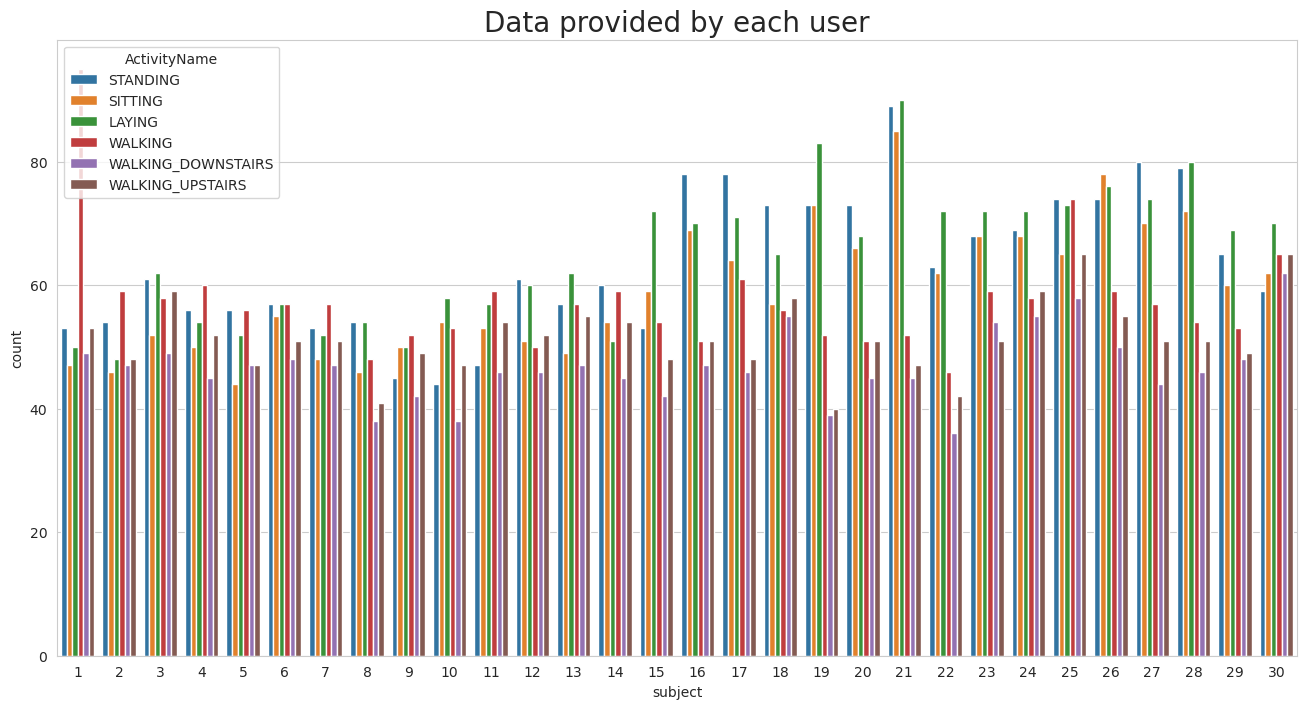

In [17]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
plt.title('Data provided by each user', fontsize=20)
sns.countplot(x='subject',hue='ActivityName', data = dataset)
plt.show()

Next the count distribution of the activities was plotted. As seen earlier, there was a clear division between active and passive activities.

In [18]:
# Plotting data
label_counts = dataset['ActivityName'].value_counts()

# Get colors
n = label_counts.shape[0]
colormap = plt.get_cmap('viridis')
colors = [mlt.colors.to_hex(colormap(col)) for col in np.arange(0, 1.01, 1/(n-1))]

# Create plot
data = go.Bar(x = label_counts.index,
              y = label_counts,
              marker = dict(color = colors))

layout = go.Layout(title = 'Smartphone ActivityName Distribution',
                   xaxis = dict(title = 'ActivityName'),
                   yaxis = dict(title = 'Count'))

fig = go.Figure(data=[data], layout=layout)
fig.show()
#iplot(fig)

The densities of the different activities were plotted against the mean magnitude of the body acceleration of the subjects. This value indicates the degree of movement in the subject's body. This value alone was able to distinguish clearly between the stationary and moving activities.

C:\Users\moakht\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\moakht\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\moakht\AppData\Local\anaconda3\Lib\si

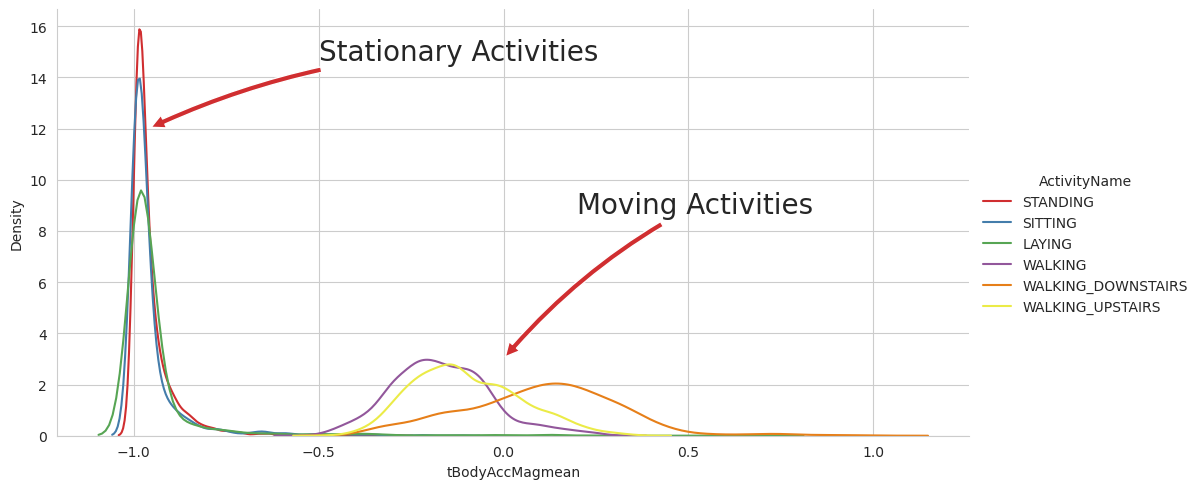

In [19]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(dataset, hue='ActivityName', height=5,aspect=2)
facetgrid.map(sns.distplot,'tBodyAccMagmean', hist=False)\
    .add_legend()
plt.annotate("Stationary Activities", xy=(-0.960,12), xytext=(-0.5, 15), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0,3), xytext=(0.2, 9), size=20,\
            va='center', ha='left',\
            arrowprops=dict(arrowstyle="simple",connectionstyle="arc3,rad=0.1"))
plt.show()

The same test was conducted for the stationary and moving activities separately. For the stationary activities, they all peaked around the same mean magnitude with different peak densities. However, for the moving activities, walking downstairs showed a slight deviation from the other two, indicating that there may be a potential third cluster that can be created.

C:\Users\moakht\AppData\Local\Temp\ipykernel_26052\1983307615.py:12: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\moakht\AppData\Local\Temp\ipykernel_26052\1983307615.py:13: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\moakht\AppData\Local\Temp\ipykernel_26052\1983307615.py:14: UserW

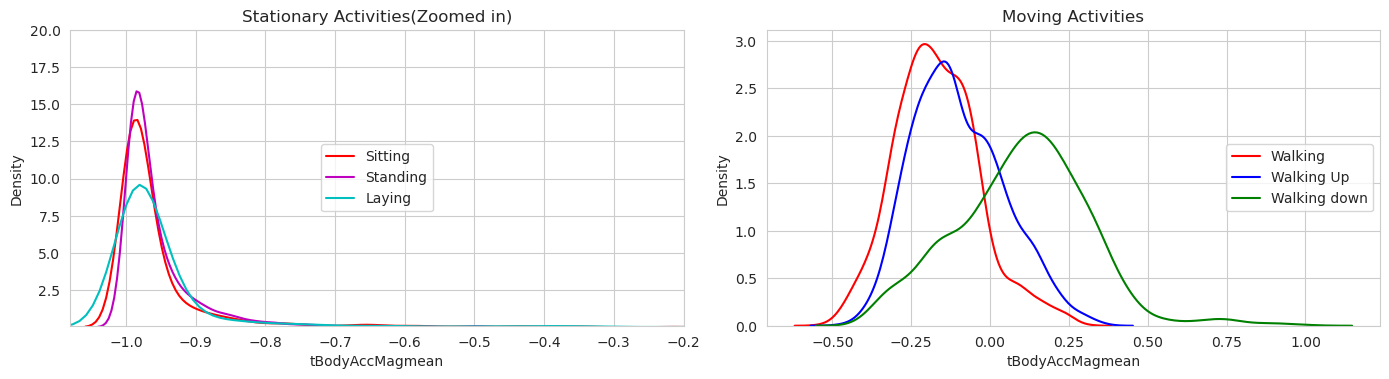

In [20]:
# for plotting purposes taking datapoints of each activity to a different dataframe
df1 = dataset[dataset['Activity']==1]
df2 = dataset[dataset['Activity']==2]
df3 = dataset[dataset['Activity']==3]
df4 = dataset[dataset['Activity']==4]
df5 = dataset[dataset['Activity']==5]
df6 = dataset[dataset['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities(Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'Sitting')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'Standing')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'Laying')
plt.axis([-1.08, -0.2, 0.1, 20])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'Walking Up')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'Walking down')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

The original test was conducted using boxplots, confirming the original observations.

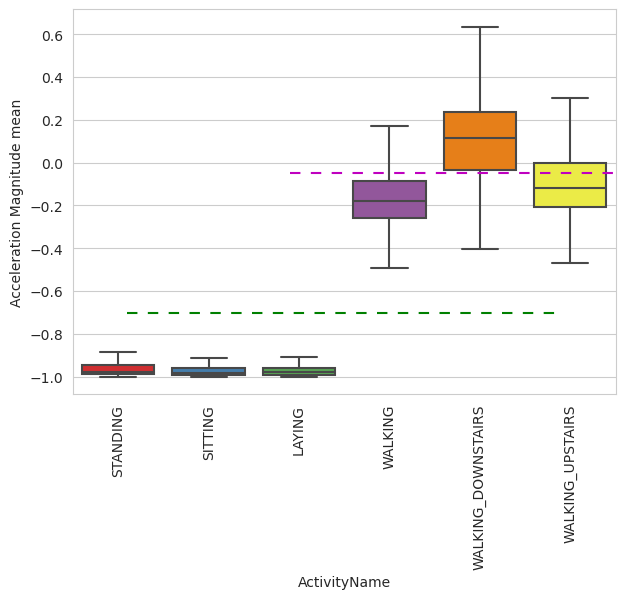

In [21]:
plt.figure(figsize=(7,5))
sns.boxplot(x='ActivityName', y='tBodyAccMagmean',data=dataset, showfliers=False, saturation=1)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

After the degree of movement, the variation in gravity and it's correlation with the different activities was tested. This was done by plotting the mean gravity angle in the x and y axis in a box plot. This shows that laying can be easily distinguished from the rest of the activities using these features. 

All in all, the features measured by the sensors provide significant details about the activities being performed. Thus, only the subject name, activity type and activity name were removed from the dataset being used by the clustering algorithm. This was done to not perform any dimensionality reduction before task 1.

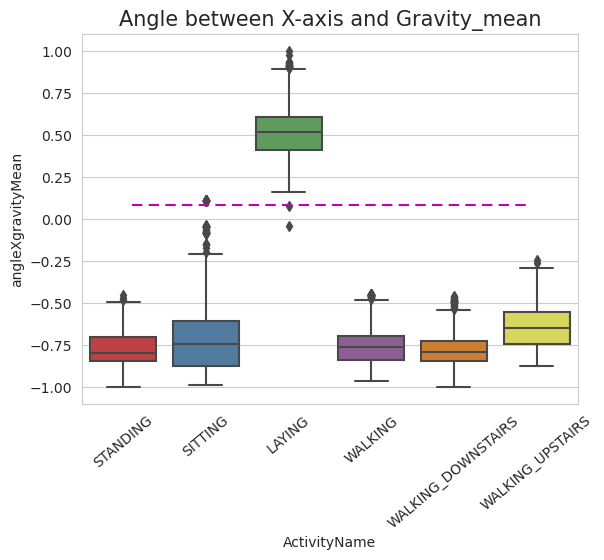

In [22]:
sns.boxplot(x='ActivityName', y='angleXgravityMean', data=dataset)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='m',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.show()

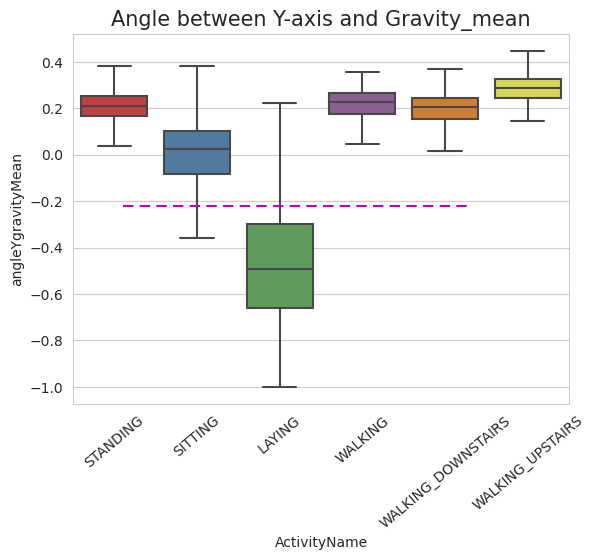

In [23]:
sns.boxplot(x='ActivityName', y='angleYgravityMean', data = dataset, showfliers=False)
plt.title('Angle between Y-axis and Gravity_mean', fontsize=15)
plt.xticks(rotation = 40)
plt.axhline(y=-0.22, xmin=0.1, xmax=0.8, dashes=(5,3), c='m')
plt.show()

### Cluster Selection for K-Means

The following function performs k means on a range of clusters from 1 to 11. It calculates the inertia and sillhouette score. These are then used to plot two graphs in order to determine the best number of clusters using both the elbow method and the sillhouette score method.

In [24]:
def elbow_sillhouette(X):
    inertia = []
    silhouette_scores = []
    K_range = range(2, 11)

    #performing once only for elbow method, sillhoute is performed from 2 to 11
    kmeans = KMeans(n_clusters=1, random_state=1, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=1, n_init=10)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1,11), inertia, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.title('Elbow Method')

    plt.subplot(1, 2, 2)
    plt.plot(K_range, silhouette_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')

    plt.tight_layout()
    plt.show()


### Epsilon Selection for DBSCAN

The best epsilon value for DBSCAN is estimated using the nearest neighbors approach

In [25]:
def plot_epsilon(X):
    # DBSCAN Clustering
    # Estimating optimal eps value using the Nearest Neighbors approach
    neighbors = NearestNeighbors(n_neighbors=2)
    neighbors_fit = neighbors.fit(X)
    distances, indices = neighbors_fit.kneighbors(X)

    distances = np.sort(distances, axis=0)
    distances = distances[:, 1]
    plt.figure(figsize=(5, 5))
    plt.plot(distances)
    plt.title('K-distance Graph')
    plt.xlabel('Points sorted by distance')
    plt.ylabel('Epsilon')
    plt.show()

### Task 1

Using both elbow and sillhouette score methods, the optimal number of clusters for K-Means is 2.

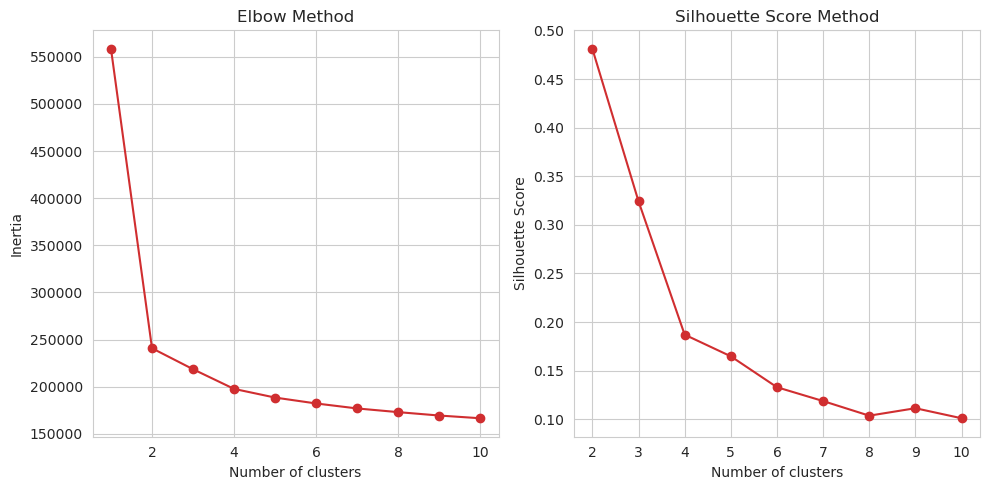

In [26]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

X = dataset.drop(['ActivityName', 'subject', 'Activity'], axis=1)

# K-Means Clustering
# Determining the optimal number of clusters using the Elbow Method
elbow_sillhouette(X)

In [27]:
optimal_k = 2
t = time.time()
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10).fit(X)
t = time.time() - t
print("K-Means, Time Taken without Dimensionality Reduction: " + str(t) + " seconds")

K-Means, Time Taken without Dimensionality Reduction: 0.7269339561462402 seconds


For DBSCAN, multiple values of epsilon are tested to minimize the label value of "-1" which indicates the data points that weren't clustered at all. This came out to be 5.7585 after trial and error.

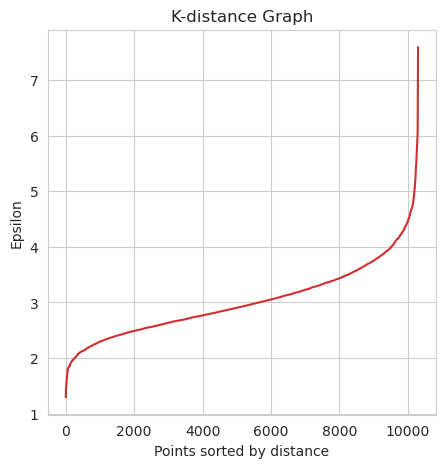

In [28]:
plot_epsilon(X)

In [29]:
# Choose an epsilon after observing the above plot, let's assume eps=0.3
# min_samples typically set to 2*dimensions of data
eps = 5.7585
min_samples = 2 * X.shape[1]

t = time.time()
dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
t = time.time() - t

print("DBSCAN Time Taken without Dimensionality Reduction: " + str(t) + " seconds")

DBSCAN Time Taken without Dimensionality Reduction: 2.8532092571258545 seconds


### Task 3 Cluster Visualization

For Cluster Visualization, both t-SNE and PCA were used to reduce the dataset to 2 dimensions. This allows us to plot the clustering on a 2D plane, allowing for visual evaluation of the algorithm's performance. The data cannot be reduced to any number of dimensions higher than 3 if we want to visualize it. Thus, 2 was selected as the optimal value since 3D visualization is also complicated on 2D planes such as the computer screen.

In [30]:
def visualize_PCA_TSNE(kmeans, dbscan, X):
    
    colors_kmeans = list(mcolors.TABLEAU_COLORS)
    colors_db = ['k'] + list(mcolors.TABLEAU_COLORS)  # 'k' + Tableau colors for clusters
    cmap_db = mcolors.ListedColormap(colors_db)
    cmap_kmeans = mcolors.ListedColormap(colors_kmeans)


    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
    X_tsne = tsne.fit_transform(X)

    # Visualization with legends
    plt.figure(figsize=(12, 6))

    # PCA visualization - Original 6 Activities
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=X['Activity'], cmap=cmap_kmeans)
    plt.title('PCA - Clustering based on original 6 Activities')
    plt.legend(*scatter.legend_elements(), title="Clusters")

    # TSNE visualization - Original 6 Activities
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=X['Activity'], cmap=cmap_kmeans)
    plt.title('t-SNE - Clustering based on original 6 Activities')
    plt.legend(*scatter.legend_elements(), title="Clusters")
    
    plt.figure(figsize=(12, 6))

    # PCA visualization - DBSCAN
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan.labels_, cmap=cmap_db)
    plt.title('PCA - DBSCAN Clustering')
    plt.legend(*scatter.legend_elements(), title="Clusters")

    # t-SNE visualization - DBSCAN
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=dbscan.labels_, cmap=cmap_db)
    plt.title('t-SNE - DBSCAN Clustering')
    plt.legend(*scatter.legend_elements(), title="Clusters")

    plt.figure(figsize=(12, 6))

    # PCA visualization - KMeans
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap=cmap_kmeans)
    plt.title('PCA - KMeans Clustering')
    plt.legend(*scatter.legend_elements(), title="Clusters")
    

    # t-SNE visualization - KMeans
    plt.subplot(1, 2, 2)
    scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans.labels_, cmap=cmap_kmeans)
    plt.title('t-SNE - KMeans Clustering')
    plt.legend(*scatter.legend_elements(), title="Clusters")

    plt.show()

Visualizing the optimal K-Means and DBSCAN algorithms without dimensionality reduction using PCA and t-SNE and comparing them to the division of the original 6 activities, it can be clearly seen that the PCA visualization is more clumped together, whereas t-SNE shows distinct clumps of data. Moreover, stationary and moving activities can be easily divided into two hemispheres (left and right).

In the left hemisphere, sitting and standing are clumped together, with a better distinction in the t-SNE visualization. Laying is a separate group from the two, showing the potential for further clustering.

In the right hemisphere, Walking downstairs can be seen as a distinct cluster from the other moving activities. All these observations align with the predictions made in the EDA phase.

However, for the clustering algorithms, the curse of dimensionality limits their ability to perform clustering in such an efficient manner. 

For K-Means, it is only capable of separating the stationary and moving activities with a sillhouette score of 0.48.

For DBSCAN, a significant proportion of the data is labelled as "-1", showing that it was unable to perform clustering on it. Besides the unlabelled data points, it was also only able to distinguish between stationary and moving activities. However, it performed worse than K-Means, getting a sillhouette score of 0.41.

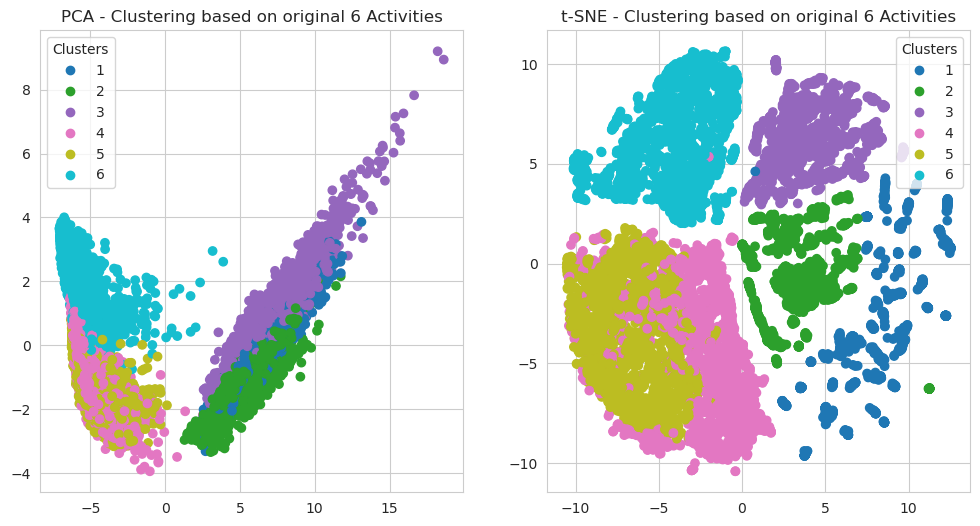

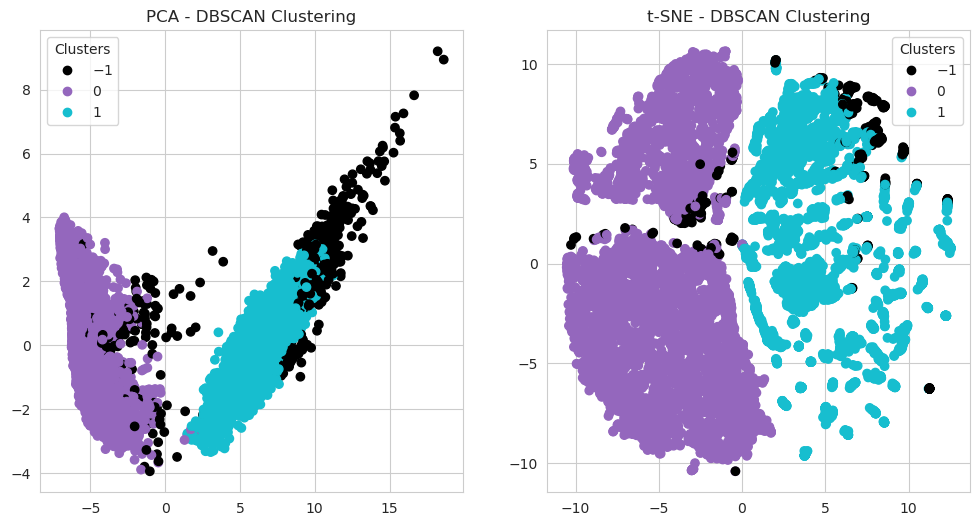

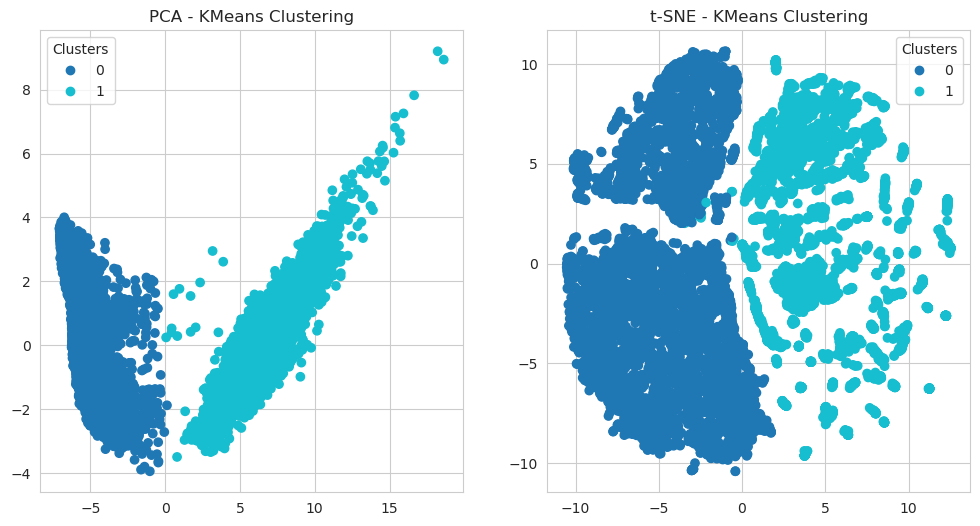

In [31]:
visualize_PCA_TSNE(kmeans, dbscan, dataset.drop(['subject', 'ActivityName'], axis=1))

In [32]:
print("DBSCAN Sillhouette Score without Dimensionality Reduction: " + str(silhouette_score(X, dbscan.labels_)))
print("K-Means Sillhouette Score without Dimensionality Reduction: " + str(silhouette_score(X, kmeans.labels_)))

DBSCAN Sillhouette Score without Dimensionality Reduction: 0.40981655127799393
K-Means Sillhouette Score without Dimensionality Reduction: 0.48107627299425504


### Task 2

The dimensions were reduced to contain 83% of the variance from the original data using PCA Dimensionality Reduction. This value was obtained through trial and error, maximizing the performance difference with as little amount of dimensionality reduction as necessary. The reduced dataset contained only 15 features.

In [33]:
pca = PCA(n_components=0.83)
X_pca = pca.fit_transform(X)

In [34]:
X_pca.shape

(10299, 15)

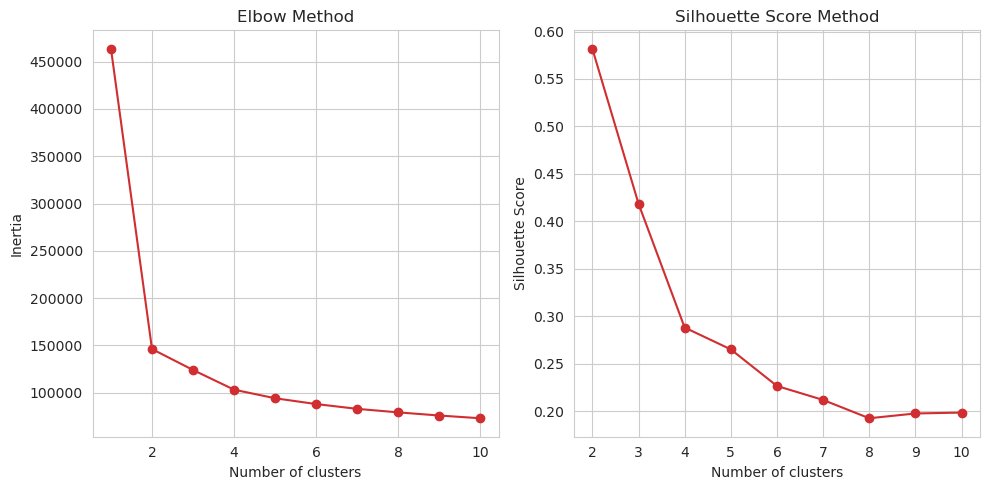

In [35]:
elbow_sillhouette(X_pca)

In [36]:
optimal_k = 2

t = time.time()
kmeans_reduced = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10).fit(X_pca)
t = time.time() - t
print("K-Means, Time Taken with Dimensionality Reduction: " + str(t) + " seconds")

K-Means, Time Taken with Dimensionality Reduction: 0.3338472843170166 seconds


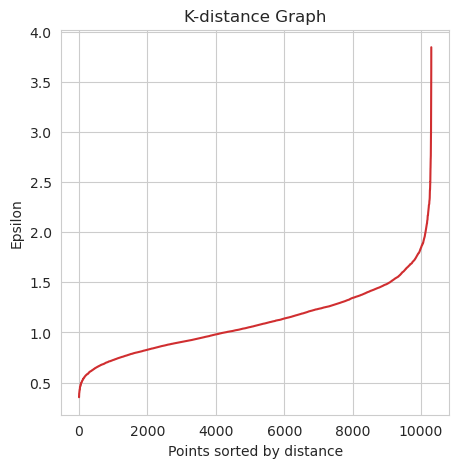

In [37]:
plot_epsilon(X_pca)

In [38]:
# Choose an epsilon after observing the above plot, let's assume eps=0.3
# min_samples typically set to 2*dimensions of data
eps = 2.976
min_samples = 2 * X_pca.shape[1]

t = time.time()
dbscan_reduced = DBSCAN(eps=eps, min_samples=min_samples).fit(X_pca)
t = time.time() - t

print("DBSCAN Time Taken with Dimensionality Reduction: " + str(t) + " seconds")

DBSCAN Time Taken with Dimensionality Reduction: 2.481757402420044 seconds


With Dimensionality Reduction retaining 83% of variance. The clustering performance on the original data was not significantly improved. The algorithms were only able to identify the 2 major clusters. For further clustering improvement, the integrity of the information in the dataset may need to be compromised by removing even more features.

However, the performance of DBSCAN did improve significantly as the number of "-1" labels were significantly reduced, increasing the sillhouette score to 0.45. There wasn't any difference in the K-Means performance.

This shows that the large dimensionality of the dataset was somewhat redundant and a similar performance can be achieved even if the features are reduced from 561 to 15.

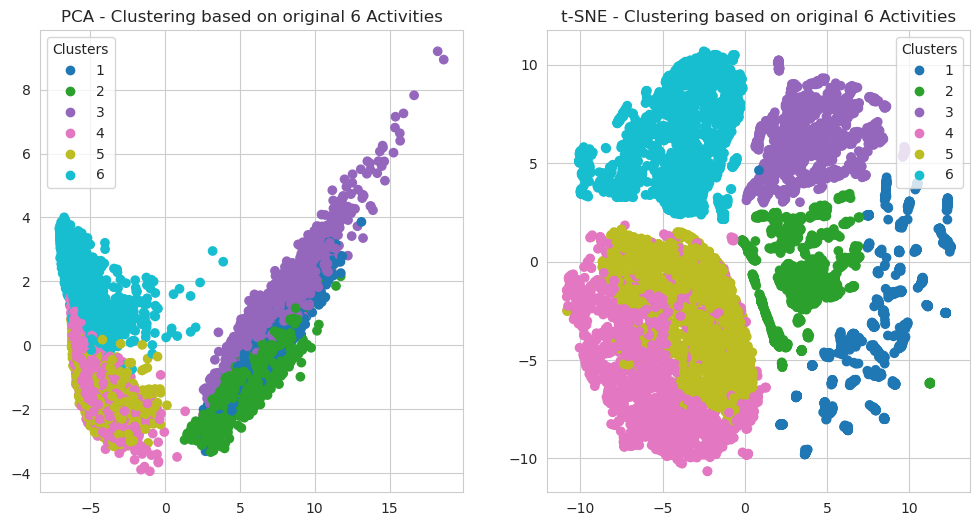

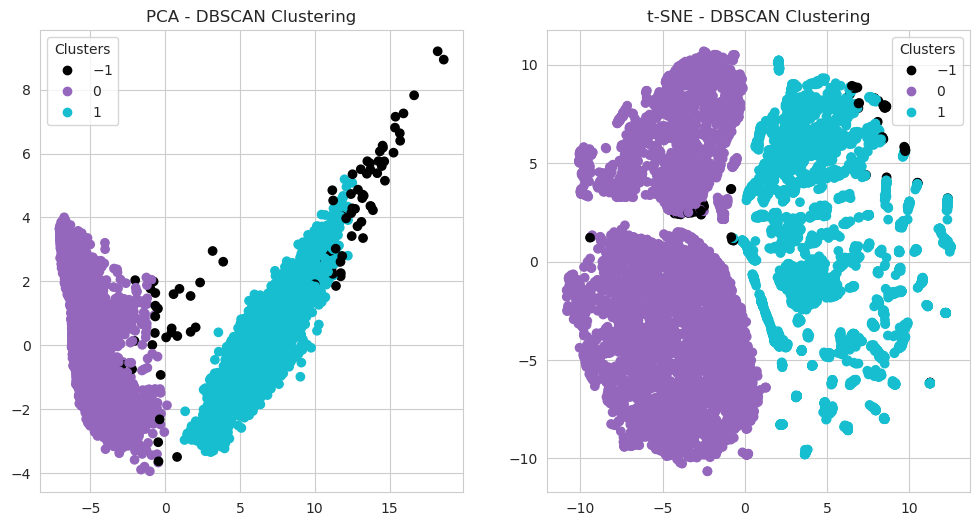

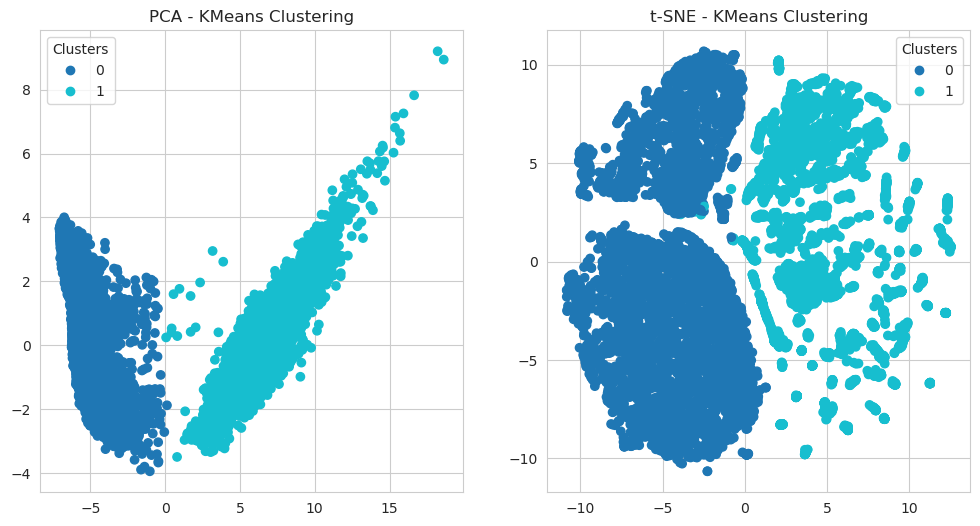

In [39]:
visualize_PCA_TSNE(kmeans_reduced, dbscan_reduced, dataset.drop(['subject', 'ActivityName'], axis=1))

In [40]:
print("DBSCAN Sillhouette Score with Dimensionality Reduction: " + str(silhouette_score(X, dbscan_reduced.labels_)))
print("K-Means Sillhouette Score without Dimensionality Reduction: " + str(silhouette_score(X, kmeans_reduced.labels_)))

DBSCAN Sillhouette Score with Dimensionality Reduction: 0.45385266641792843
K-Means Sillhouette Score without Dimensionality Reduction: 0.48107627299425504
